Yiting Wang <br>
Oct 10, 2019

# Background

This case is an example of a real-life forecasting situation where limited data is available and multiple factors contribute to making a "business case" for a new venture.  As with any case, you should seek to understand the case by visualizing the data and building a "simulation" capability that would allow you to replicate distributions and compute p&l given non-Gaussian distributions.  Such a capability is often called a Monte Carlo simulation -- hence the name of the case's protagonist.

In [49]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from prettytable import PrettyTable

%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm # Time Series Analysis
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

In [50]:
plt.rcParams['figure.figsize'] = 15,8

## Q1 ##

Ignoring the uncertainy, assume that Saturday attendance is 24,139, that 18.92% of Saturday attendees will buy the DVD, and that 4,500 DVDs are produced.  Build a function that can calculate p&l given:

(i) a forecast quantity, and  
(ii) actual demand

How much profit will be made on the DVD project if this scenario occurs?  Make a recommendation about whether Monte should have the check delivered today to the video crew for their fees.

In [52]:
n = 24139  
p = 0.1892
n_dvd = 4500

In [53]:
forecast = n * p 
actual = n_dvd

In [54]:
def get_pnl(forecast, dvd_burned, show = False):
    n = max(min(forecast, dvd_burned),0)
    revenue = 18 * n 
    recording_cost = 11740
    dvd_edit_cost = 3000
    dvd_production = 1250
    dvd_unit_cost = 0.86
    exceed_bar = 5300
    add_unit_cost = 0.2
    royalty_unit = 1.02
    fixed_cost = recording_cost + dvd_edit_cost + dvd_production
    if dvd_burned < 5300:
        variable_cost = dvd_unit_cost * dvd_burned + royalty_unit * n
    else:
        variable_cost = dvd_unit_cost * dvd_burned + add_unit_cost * (dvd_burned - 5300) + royalty_unit * n
        
    pnl = revenue - fixed_cost - variable_cost
    print("number of DVD burned: ", dvd_burned)
    print("number of forecasted purchase: ", forecast)
    print("number of DVD sold: ", n)
    print('Profit from this senario is: $', pnl)
    
    if show:
        x = PrettyTable()
        x.field_names = ["  ", "Debit", "Credit"]
        x.add_row(["revenue", revenue, " "])     
        x.add_row(["recording cost", " " ,recording_cost]) 
        x.add_row(["DVD editing cost", " " ,dvd_edit_cost])
        x.add_row(["DVD production cost", " " ,dvd_production])
        x.add_row(["--------------------", "-------" ,"--------"])
        x.add_row(["fixed cost", " ", fixed_cost])
        x.add_row(["--------------------", "-------" ,"--------"])
        x.add_row(["dvd burned cost", " " , dvd_unit_cost * dvd_burned])
        x.add_row(["royalty cost", " " , royalty_unit * n])
        x.add_row(["--------------------", "-------" ,"--------"])
        x.add_row(["variable cost", " ", variable_cost])
        x.add_row(["====================", "=======" ,"========"])
        x.add_row(["profit & loss", " ", pnl])
        
        print(x)

In [55]:
get_pnl(forecast, dvd_burned = 4500, show = True)

number of DVD burned:  4500
number of forecasted purchase:  4567.0988
number of DVD sold:  4500
Profit from this senario is: $ 56550.0
+----------------------+---------+----------+
|                      |  Debit  |  Credit  |
+----------------------+---------+----------+
|       revenue        |  81000  |          |
|    recording cost    |         |  11740   |
|   DVD editing cost   |         |   3000   |
| DVD production cost  |         |   1250   |
| -------------------- | ------- | -------- |
|      fixed cost      |         |  15990   |
| -------------------- | ------- | -------- |
|   dvd burned cost    |         |  3870.0  |
|     royalty cost     |         |  4590.0  |
| -------------------- | ------- | -------- |
|    variable cost     |         |  8460.0  |
| ==================== | ======= | ======== |
|    profit & loss     |         | 56550.0  |
+----------------------+---------+----------+


If 4500 DVDs are produced, attendance is 24139 with 18.92% of purchasing rate, the forecast quantity is 4567 DVDs and the actual supply is 4500 DVDs. The profit of selling 4500 DVDs is $ 56,550. Monte should have the check delivered today since it would generate a positive profit. 

## Q2 ##

Please provide a forecast for attendance at Saturday night's performance using case Exhibit 1 only.  Please acknowledge the uncertainty and a probability distribution.

In [56]:
df = pd.read_excel('LacLeman.xls', sheetname='A Exhibit 1')
print("Column headings:", df.columns)
df2 = df.drop(df.tail(2).index,inplace=True)

Column headings: Index(['Year', 'Saturday Attendance'], dtype='object')


//anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [57]:
df

,Year,Saturday Attendance
0,1,6510.0
1,2,43580.0
2,3,39360.0
3,4,28590.0
4,5,33560.0
5,6,13710.0
6,7,15410.0
7,8,24190.0
8,9,14240.0
9,10,19310.0


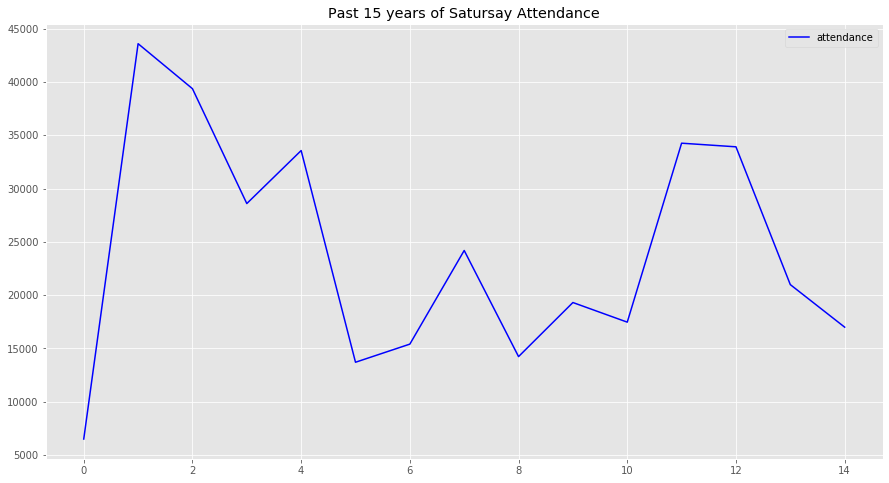

In [58]:
plt.plot(df['Saturday Attendance'], c='b', label='attendance')
plt.legend()
plt.title('Past 15 years of Satursay Attendance')
plt.show()

(array([1., 1., 4., 2., 1., 1., 0., 3., 1., 1.]),
 array([ 6510., 10217., 13924., 17631., 21338., 25045., 28752., 32459.,
        36166., 39873., 43580.]),
 <a list of 10 Patch objects>)

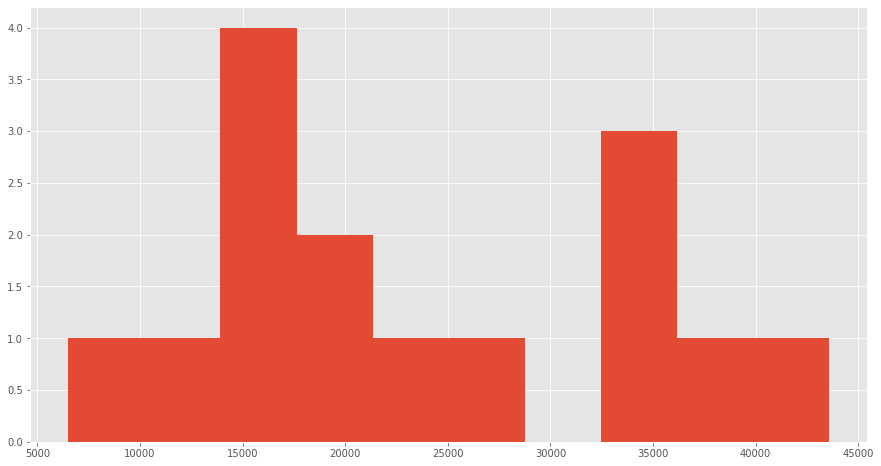

In [59]:
plt.hist(df['Saturday Attendance'])

In [60]:
import statistics as st
mean = st.mean(df['Saturday Attendance'])
sd = st.stdev(df['Saturday Attendance'])
mean, sd

(24138.666666666668, 10817.687148281524)

### Monte Carlo Simulation

In [61]:
# Assumoing attendance follows normal distribution. This is not a correct assumption due to the negative attendance. 
avg = 24138
std_dev = 10817
num_reps = 500
num_simulations = 1000
attendance = np.random.normal(avg, std_dev, num_reps).round(2)

(array([  2.,   4.,  29.,  46.,  88., 135., 109.,  66.,  15.,   6.]),
 array([-12365.91 ,  -5704.754,    956.402,   7617.558,  14278.714,
         20939.87 ,  27601.026,  34262.182,  40923.338,  47584.494,
         54245.65 ]),
 <a list of 10 Patch objects>)

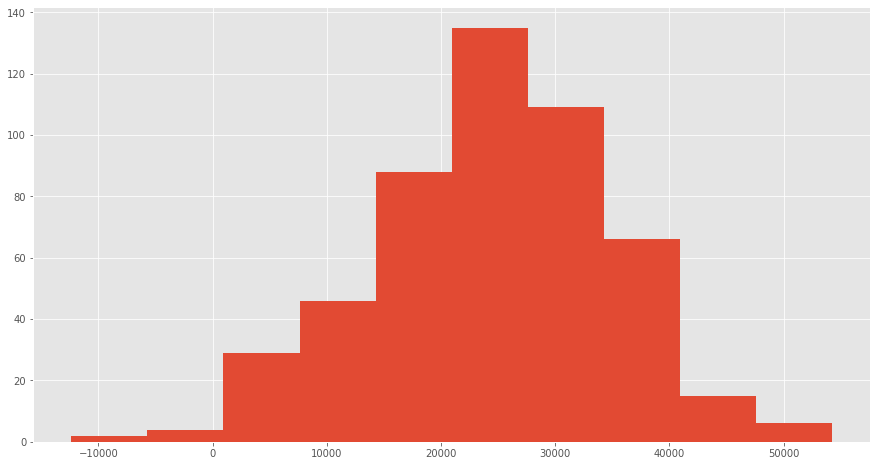

In [62]:
plt.hist(attendance)

In [63]:
# random samlping with replacement
attendance = np.random.choice(df['Saturday Attendance'], 10000)

(array([ 618.,  699., 2667., 1365.,  637.,  683.,    0., 1987.,  674.,
         670.]),
 array([ 6510., 10217., 13924., 17631., 21338., 25045., 28752., 32459.,
        36166., 39873., 43580.]),
 <a list of 10 Patch objects>)

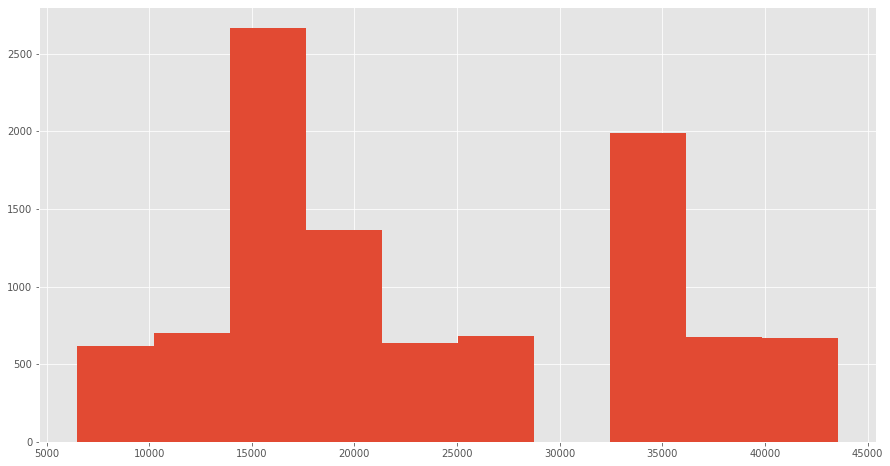

In [64]:
plt.hist(attendance)

### Using Original Data to Predict

simple split

train:  10
test :  5


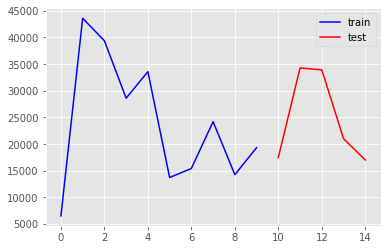

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df['Saturday Attendance'], test_size=0.3, shuffle=False)
print('train: ',len(train))
print('test : ',len(test))

plt.plot(train, c='b', label='train')
plt.plot(test, c='r', label='test')
plt.legend()
plt.show()

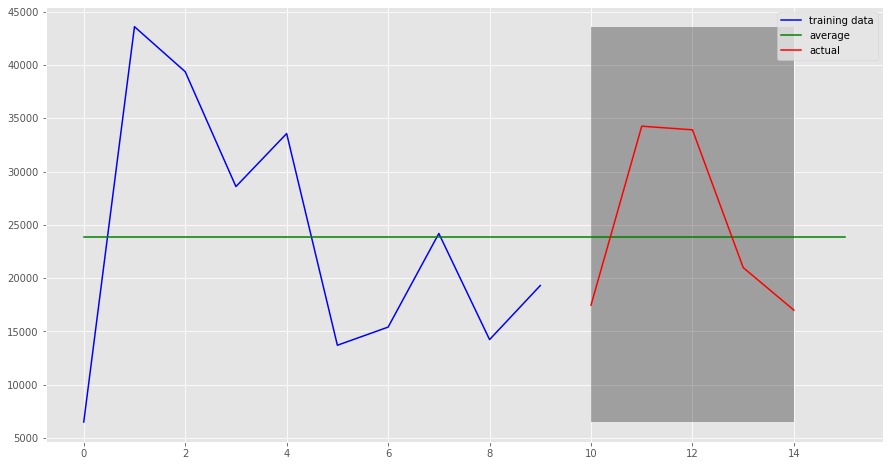

Average method prediction with 7:3 split:  23846.0


In [31]:
# average method

Y = np.array(train.tolist())
X = np.array(range(len(Y)))
Y_act = np.array(test.tolist()[:5])
X_hat = np.array(range(len(Y) + 6))

Y_all = np.concatenate((Y,Y_act), axis=0)
(low,high) = (min(Y_all), max(Y_all))
(left, right) = (max(X) + 1, max(X_hat))
avg = np.mean(Y)
Y_hat = [avg] * len(X_hat)

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat,color='g', label='average')
plt.plot(X_hat[-6:-1], Y_act,color='r', label='actual')
plt.fill_between(range(left,right), low,high, facecolor='k', alpha=.3)
plt.legend()
plt.show()
print("Average method prediction with 7:3 split: ", avg)

Niave

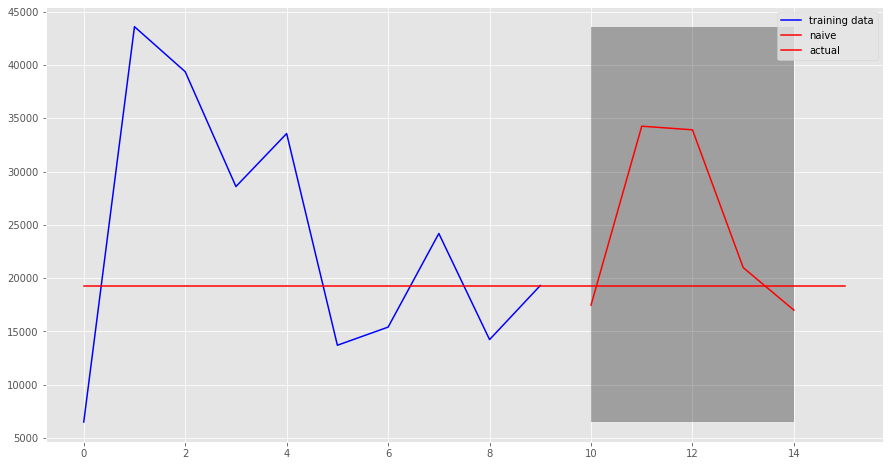

Naive Prediction with 7:3 split:  19310.0


In [32]:
# naive method
Y = np.array(train.tolist())
X = np.array(range(len(Y)))

X_hat = np.array(range(len(Y) + 6))
Y_hat = [Y[-1]] * len(X_hat)
Y_act = np.array(test.tolist()[:5])
Y_all = np.concatenate((Y,Y_act), axis=0)
(left, right) = (max(X) + 1, max(X_hat))
(low,high) = (min(Y_all), max(Y_all))

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat,Y_hat,color='r', label='naive')
plt.plot(X_hat[-6:-1], Y_act,color='r', label='actual')
plt.fill_between(range(left,right), low,high, facecolor='k', alpha=.3)
plt.legend()
plt.show()
print('Naive Prediction with 7:3 split: ', Y_hat[0])

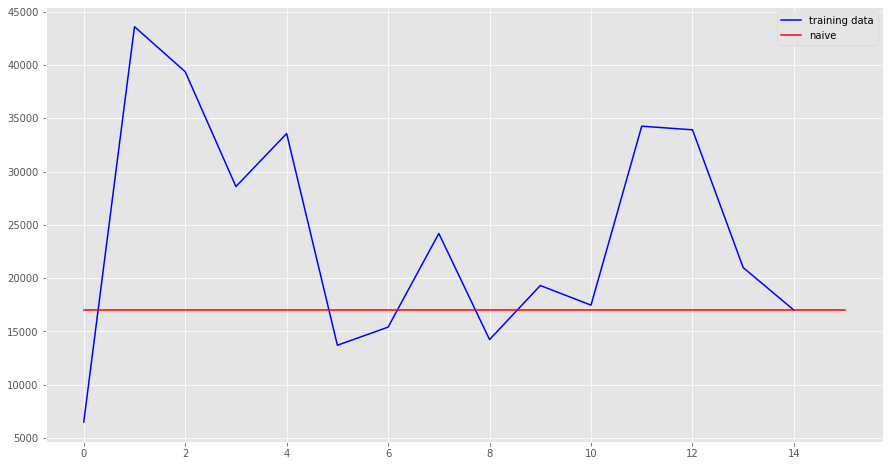

Naive Prediction without split:  17000.0


In [33]:
# Without Split
Y = np.array(df['Saturday Attendance'].tolist())
X = np.array(range(len(Y)))

X_hat = np.array(range(len(Y) + 1))
Y_hat = [Y[-1]] * len(X_hat)

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat,Y_hat,color='r', label='naive')
plt.legend()
plt.show()
print('Naive Prediction without split: ', Y_hat[0])

Drift

[ 6510.          7932.22222222  9354.44444444 10776.66666667
 12198.88888889 13621.11111111 15043.33333333 16465.55555556
 17887.77777778 19310.         20732.22222222 22154.44444444
 23576.66666667 24998.88888889 26421.11111111 27843.33333333]
[17470. 34250. 33910. 20990. 17000.]


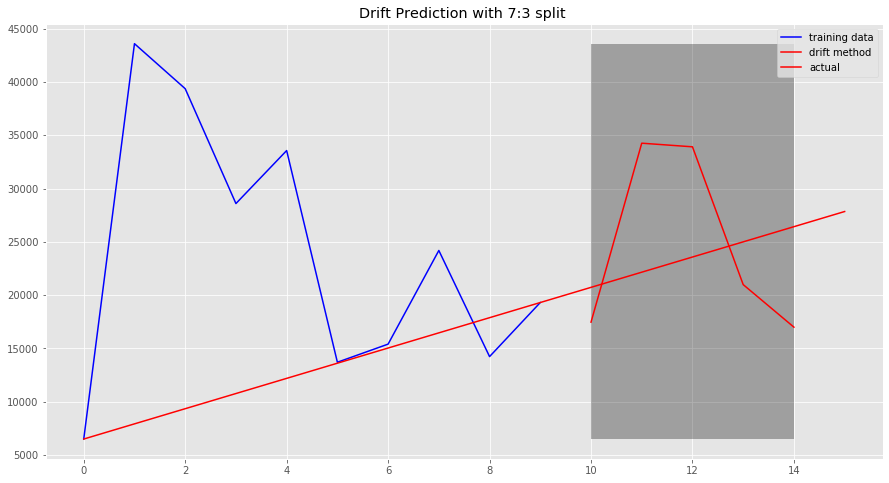

Drift Prediction with 7:3 split:  27843.333333333332


In [27]:
# drift method

Y = np.array(train.tolist())
X = np.array(range(len(Y)))

# y = m * x + b
m = (Y[-1] - Y[0]) / (X[-1] - X[0])
b = Y[0]

X_hat = np.array(range(len(Y) + 6))
Y_hat = m*X_hat + b

Y_act = np.array(test.tolist())
Y_all = np.concatenate((Y,Y_act), axis=0)
(left, right) = (max(X) + 1, max(X_hat))
(low,high) = (min(Y_all), max(Y_all))

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='drift method')
plt.plot(X_hat[-6:-1], Y_act,color='r', label='actual')
plt.fill_between(range(left,right), low,high, facecolor='k', alpha=.3)
plt.legend()
plt.title('Drift Prediction with 7:3 split ')
plt.show()
print('Drift Prediction with 7:3 split: ', Y_hat[-1])

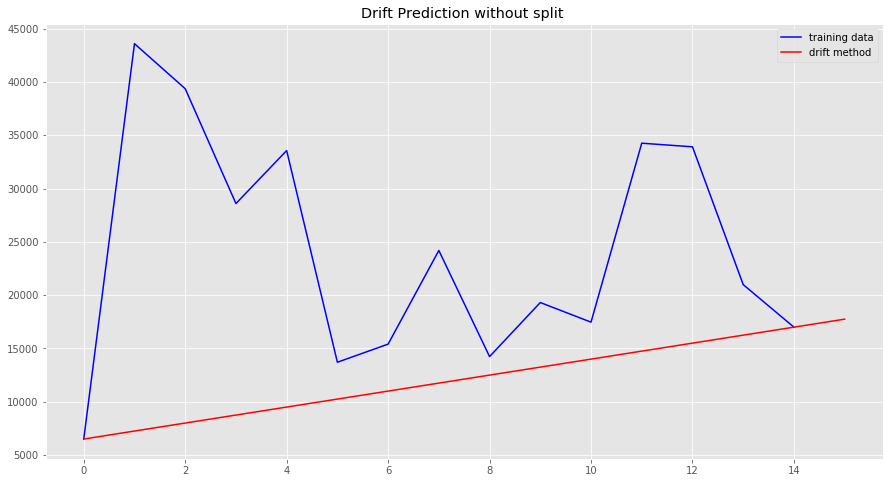

Drift Prediction without split:  17749.285714285717


In [35]:
# Without Split
Y = np.array(df['Saturday Attendance'].tolist())
X = np.array(range(len(Y)))

# y = m * x + b
m = (Y[-1] - Y[0]) / (X[-1] - X[0])
b = Y[0]

X_hat = np.array(range(len(Y) + 1))
Y_hat = m*X_hat + b

(left, right) = (max(X) + 1, max(X_hat))
(low,high) = (min(Y), max(Y))

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='drift method')
plt.legend()
plt.title('Drift Prediction without split ')
plt.show()
print('Drift Prediction without split: ', Y_hat[-1])

Linear Regression

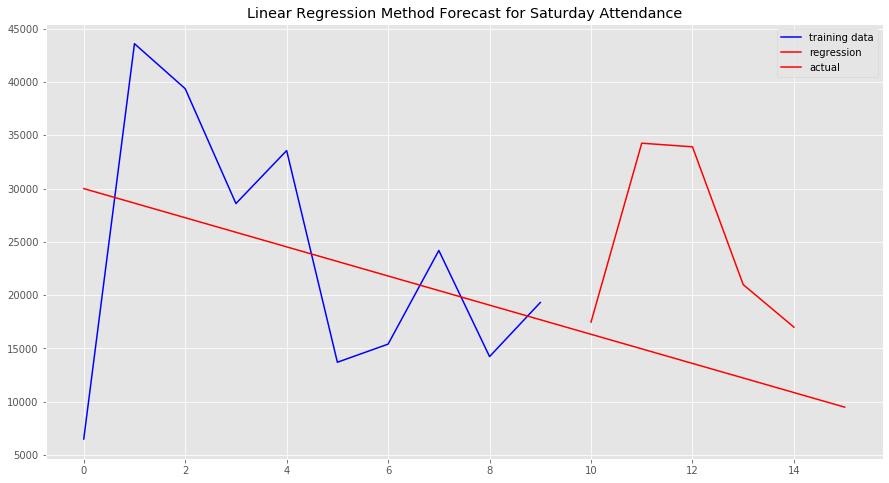

Linear Regression Prediction with 7:3 split:  9501.090909090912


In [38]:
# linear regression with split
from scipy import stats

Y = np.array(train.tolist())
X = np.array(range(len(Y)))

# y = m * x + b
(m, b, r_value, p_value, std_err) = stats.linregress(X,Y)

X_hat = np.array(range(len(Y) + 6))
Y_hat = m * X_hat + b

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='regression')
plt.plot(X_hat[-6:-1], Y_act, color='r', label='actual')
plt.fill_between(range(left,right), low,high, facecolor='k', alpha=.3)
plt.legend()
plt.title('Linear Regression Method Forecast for Saturday Attendance')
plt.show()
print('Linear Regression Prediction with 7:3 split: ', Y_hat[-1])

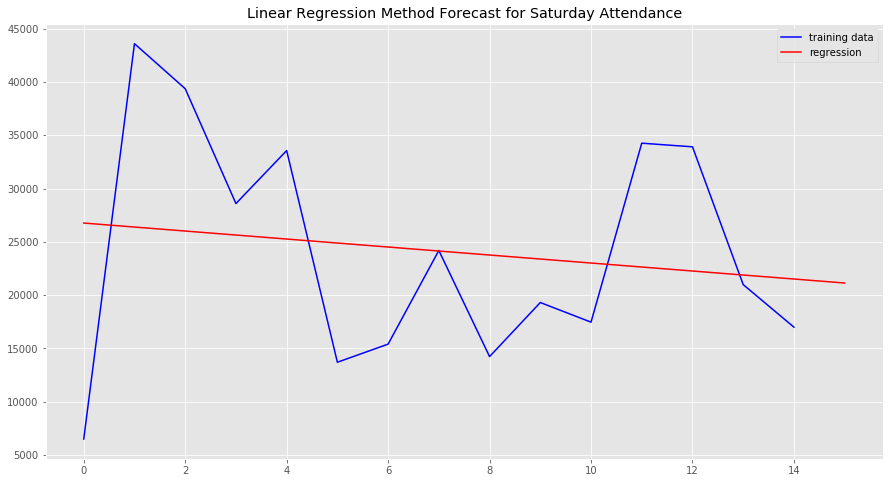

Linear Regression Prediction without split:  21139.809523809527


In [39]:
# without split
Y = np.array(df['Saturday Attendance'].tolist())
X = np.array(range(len(Y)))

# y = m * x + b
(m, b, r_value, p_value, std_err) = stats.linregress(X,Y)

X_hat = np.array(range(len(Y) + 1))
Y_hat = m * X_hat + b

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='regression')
plt.legend()
plt.title('Linear Regression Method Forecast for Saturday Attendance')
plt.show()
print('Linear Regression Prediction without split: ', Y_hat[-1])

Since the Saturday attendance is uncertain, and probability distribution of attendance is unknown, using the basic linear regression without splitting to estimate the upcoming Saturday attendance is not a bad choice. The estimated number of attendance is 21139. 

### Using Simulated Data to Predict

If using random ramdom sampling to simulate 1000 data, and using linear regression without test-train split:

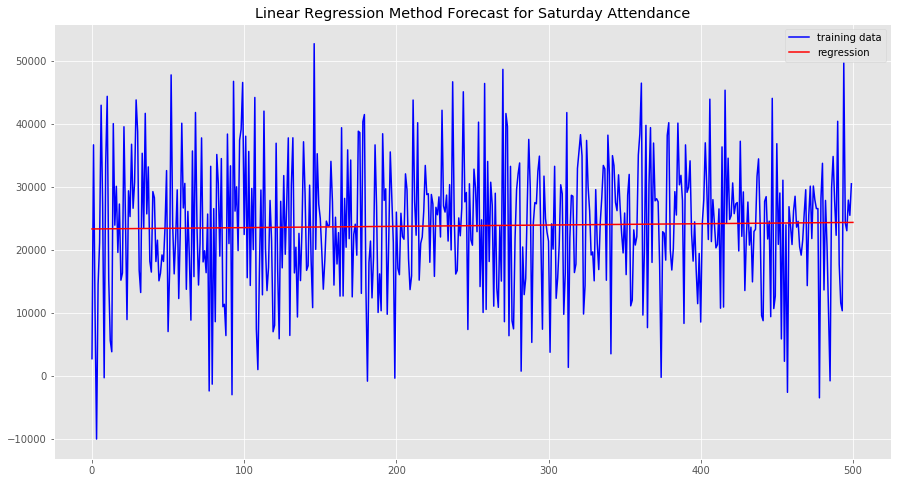

Linear Regression Prediction without split:  24374.594709739475


In [14]:
# without split
Y = np.array(attendance.tolist())
X = np.array(range(len(Y)))

# y = m * x + b
(m, b, r_value, p_value, std_err) = stats.linregress(X,Y)

X_hat = np.array(range(len(Y) + 1))
Y_hat = m * X_hat + b

plt.plot(X,Y, color='b', label='training data')
plt.plot(X_hat, Y_hat, color='r', label='regression')
plt.legend()
plt.title('Linear Regression Method Forecast for Saturday Attendance')
plt.show()
print('Linear Regression Prediction without split: ', Y_hat[-1])

### Rank the 15 years of Attendance

In [94]:
x = list(df['Saturday Attendance'])

In [95]:
x.sort()

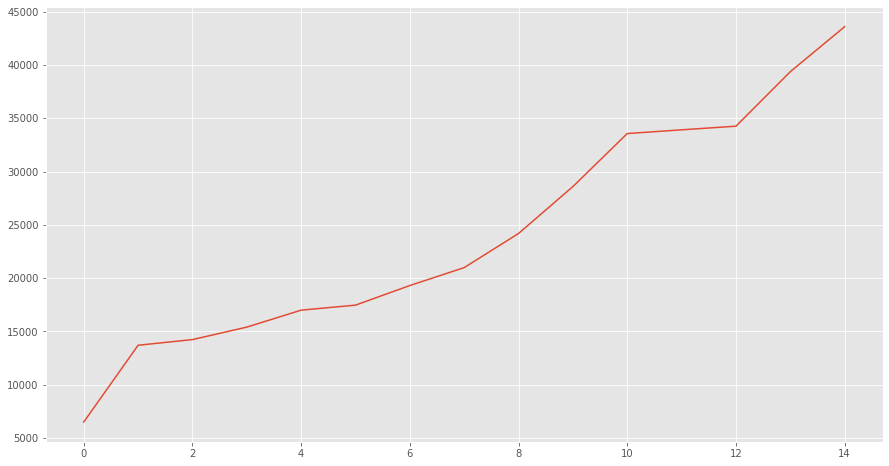

In [90]:
plt.plot([i for i in range(len(x))], x)

## Q3

Fyno has stated (case Exhibit 2) that he estimates the mean proportion of attendees who will buy the DVD to be 0.1892.  He also believes that there is uncertainty in this number which based on a sample of 37 individuals.  If on individual's outcome has a standard deviation of 0.3917, what is the standard deviation of the average proportion of 37 people?  Use this standard deviation along with the mean of 0.1892 in your analysis of later questions.

Among the 37 replies, 7 said yes. Individual's outcome has a standard deviation of 0.3917. Individual outcome has a Bernoulli distribution, with E(x) = 0.1892, Var(x) = 0.1892 * 0.8108 = 0.1534, sd(x) = 0.3917. Replies of 37 People follow a Binomial distribution with E(x) = 37 * 0.1892, Var(x) = 37 * 0.1892 * 0.8108, sd(x) = sqrt(37 * 0.1534).

In [3]:
import math

In [4]:
math.sqrt(37 * .1534)

2.382393754189261

## Q4

The weather forecast seemed important to Fyno, along with the number of people in attendance at Friday's concert.  Make your best use of that information to provide an updated complete forecast of attendance at Saturday's concert.  Produce a histogram of the expected attendance.

In [14]:
df2 = pd.read_excel('LacLeman.xls', sheetname='B Exhibit 1')

//anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [15]:
df2

,Year,Friday Rain,Friday Attendance,Saturday Rain,Saturday Attendance
0,1,1.000000,3960.000000,1.000000,6510.000000
1,2,1.000000,26920.000000,0.000000,43580.000000
2,3,0.000000,25430.000000,0.000000,39360.000000
3,4,1.000000,17750.000000,0.000000,28590.000000
4,5,0.000000,24910.000000,0.000000,33560.000000
5,6,1.000000,10210.000000,1.000000,13710.000000
6,7,1.000000,8910.000000,0.000000,15410.000000
7,8,0.000000,27080.000000,1.000000,24190.000000
8,9,0.000000,14140.000000,1.000000,14240.000000
9,10,0.000000,12740.000000,0.000000,19310.000000


In [16]:
df2.drop(df2.tail(2).index,inplace=True)   # drop last two rows of mean variance

In [ ]:
# df2 = pd.DataFrame(df2)

### Using Original Data to Predict

linear regression prediction

In [10]:
import numpy as np
import pandas as pd

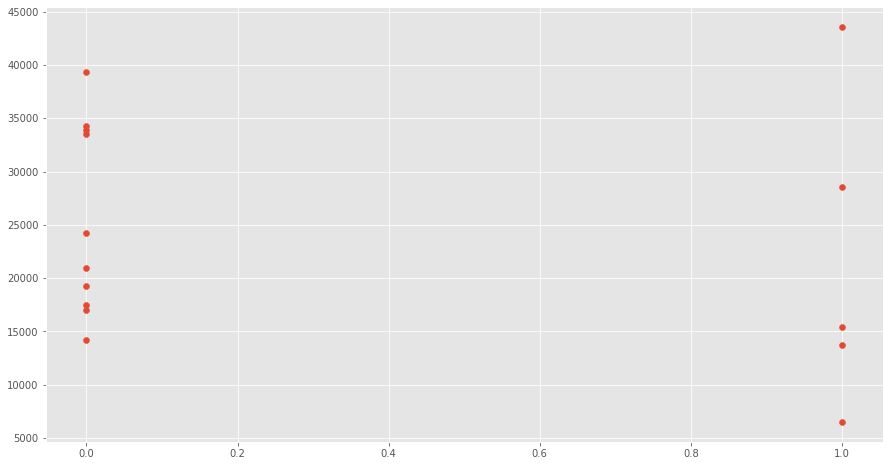

In [98]:
plt.scatter(df2['Friday Rain'],df2['Saturday Attendance'])

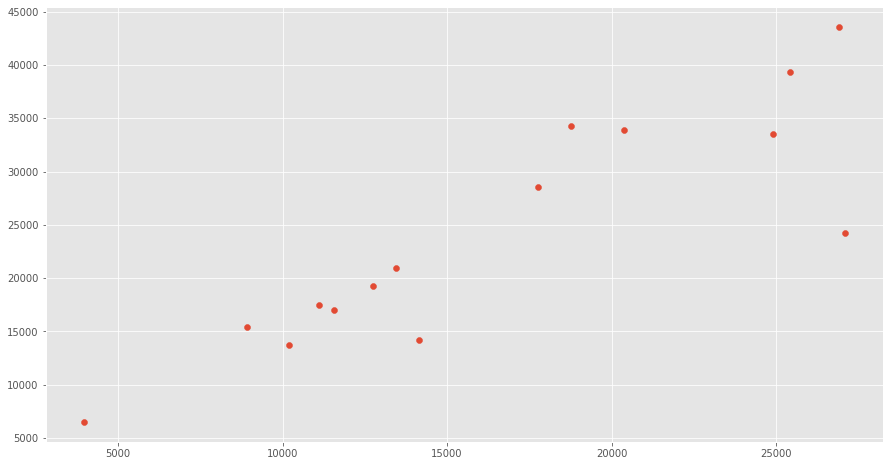

In [99]:
plt.scatter(df2['Friday Attendance'],df2['Saturday Attendance']) # linear relationship 

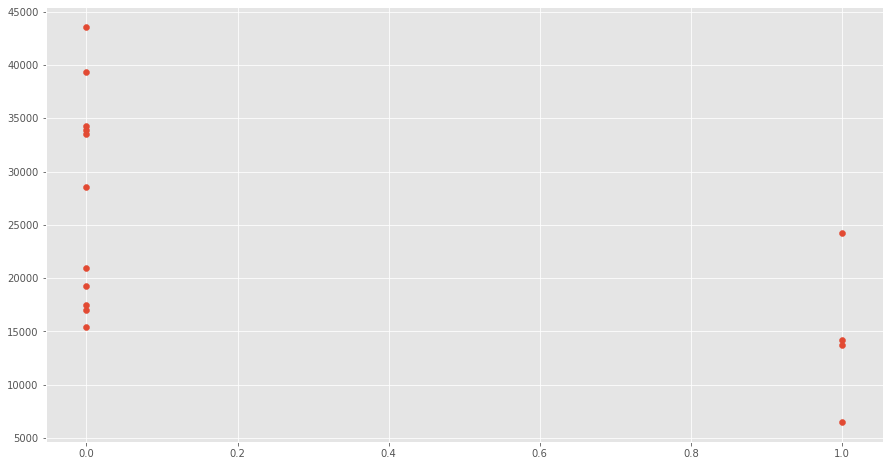

In [100]:
plt.scatter(df2['Saturday Rain'],df2['Saturday Attendance'])

In [11]:
from sklearn import linear_model
import statsmodels.api as sm

In [17]:
# With regressors: 'Friday Rain', 'Friday Attendance', 'Saturday Rain'
X = df2[['Friday Rain', 'Friday Attendance', 'Saturday Rain']]
Y = df2['Saturday Attendance']

# sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
# New_Year = 16
New_Friday_rain = 0
New_Friday_attendance = 18394
New_Saturday_rain = 0.8
print ('Predicted Saturday Attendance: \n', regr.predict(
    [[New_Friday_rain, New_Friday_attendance, New_Saturday_rain]]))

# Statsmodels                                          
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

Intercept: 
 4777.842241311788
Coefficients: 
 [ 3.49224973e+03  1.25258955e+00 -9.20670088e+03]
Predicted Saturday Attendance: 
 [20452.613695]


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Saturday Attendance   R-squared:                       0.919
Model:                             OLS   Adj. R-squared:                  0.897
Method:                  Least Squares   F-statistic:                     41.80
Date:                 Mon, 14 Oct 2019   Prob (F-statistic):           2.64e-06
Time:                         20:30:32   Log-Likelihood:                -141.22
No. Observations:                   15   AIC:                             290.4
Df Residuals:                       11   BIC:                             293.3
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4777.8422   2784.729      1.716      0.114   -1351.305    1.09e+04
Friday Rain        3492.2497   2013.177      1.735      0.111    -938.724    7923.223
Friday Attendance     1.2526      0.137      9.173      0.000       0.952       1.553
Saturday Rain     -9206.7009   2104.223     -4.375      0.001   -1.38e+04   -4575.338
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.343
Skew:                           0.143   Prob(JB):                        0.842
Kurtosis:                       2.316   Cond. No.                     6.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# With regressors: 'Friday Attendance', 'Saturday Rain'
X = df2[['Friday Attendance', 'Saturday Rain']]
Y = df2['Saturday Attendance']

# sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Friday_attendance = 18394
New_Saturday_rain = 0.8
print ('Predicted Saturday Attendance: \n', regr.predict(
    [[New_Friday_attendance, New_Saturday_rain]]))

# Statsmodels                                          
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

Intercept: 
 6812.777430562386
Coefficients: 
 [ 1.19054527e+00 -8.63635306e+03]
Predicted Saturday Attendance: 
 [21802.58468316]


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Saturday Attendance   R-squared:                       0.897
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                     52.42
Date:                 Mon, 14 Oct 2019   Prob (F-statistic):           1.17e-06
Time:                         20:30:35   Log-Likelihood:                -143.03
No. Observations:                   15   AIC:                             292.1
Df Residuals:                       12   BIC:                             294.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6812.7774   2728.841      2.497      0.028     867.144    1.28e+04
Friday Attendance     1.1905      0.142      8.361      0.000       0.880       1.501
Saturday Rain     -8636.3531   2245.639     -3.846      0.002   -1.35e+04   -3743.526
==============================================================================
Omnibus:                        1.654   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                0.871
Skew:                          -0.006   Prob(JB):                        0.647
Kurtosis:                       1.819   Cond. No.                     5.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariate Linear Regression using Simulation

In [27]:
Friday_rain = np.random.binomial(1, 0.3333, 500)
Saturday_rain = np.random.binomial(1, 0.2667, 500)
Friday_atten = np.random.choice(df2['Friday Attendance'], 500)
df3 = pd.DataFrame(index=range(500), data={'Friday Rain': Friday_rain,'Friday Attendance': Friday_atten,
                                               'Saturday Rain':Saturday_rain, 'Attendance': attendance})

In [28]:
# using regressor friday rain, friday attendance, and saturday rain
df3['Saturday Attendance'] = 4777.8422 + 3492.25 * df3['Friday Rain'] + 1.2526 * df3['Friday Attendance'] - 9206.7 * df3['Saturday Rain']

(array([  5.,   8.,  65.,  51., 112.,  66.,  52.,  51.,  28.,  62.]),
 array([  531.4382,  4697.3444,  8863.2506, 13029.1568, 17195.063 ,
        21360.9692, 25526.8754, 29692.7816, 33858.6878, 38024.594 ,
        42190.5002]),
 <a list of 10 Patch objects>)

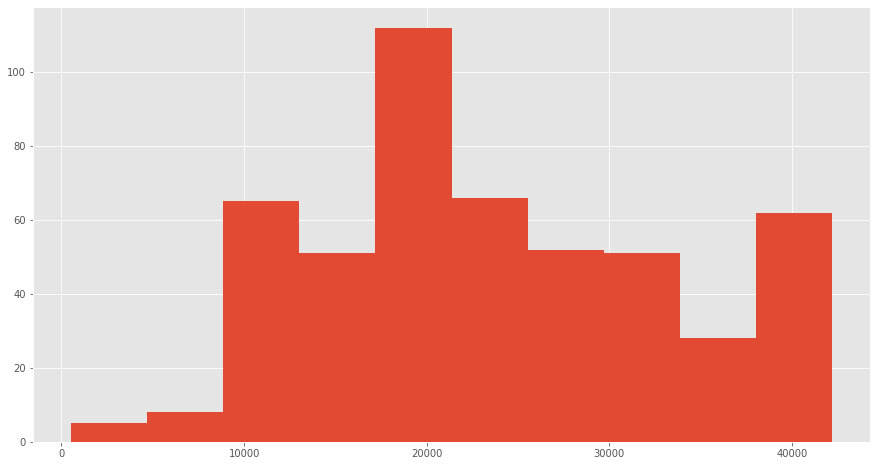

In [29]:
# histogram of expected attendance
plt.hist(df3['Saturday Attendance'])

(array([ 34.,  27., 139.,  76.,  32.,  31.,   0.,  94.,  38.,  29.]),
 array([ 6510., 10217., 13924., 17631., 21338., 25045., 28752., 32459.,
        36166., 39873., 43580.]),
 <a list of 10 Patch objects>)

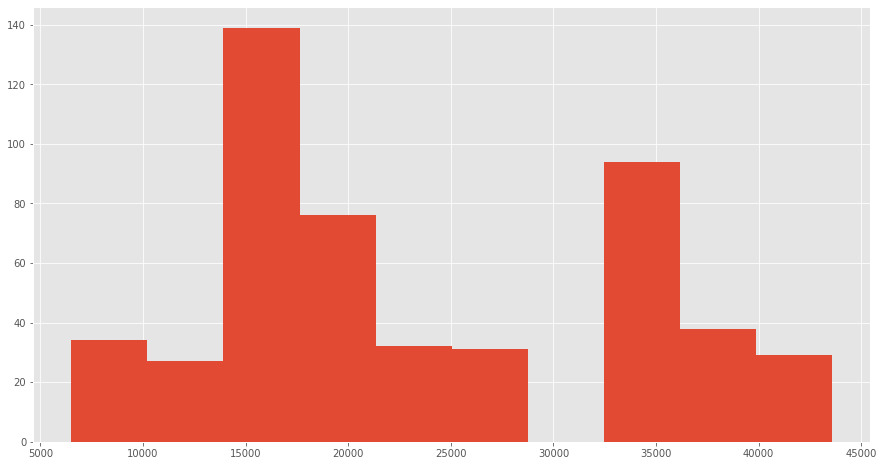

In [30]:
plt.hist(df3['Attendance'])

### Using Simulation to Predict

In [28]:
# With regressors: 'Friday Rain', 'Friday Attendance', 'Saturday Rain'
sat_att = []

# Loop through 1000 simulations
for i in range(1000):
    
    Friday_rain = np.random.binomial(1, 0.3333, 500)
    Saturday_rain = np.random.binomial(1, 0.2667, 500)
    Friday_atten = np.random.choice(df2['Friday Attendance'], 500)

    X = pd.DataFrame(index=range(500), data={'Friday Rain': Friday_rain,'Friday Attendance': Friday_atten,
                                               'Saturday Rain':Saturday_rain})

    Y = np.random.choice(df2['Saturday Attendance'], 500)

    # sklearn
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    
    df['Saturday Attendance'] = regr.intercept_ + regr.coef_[0] * X['Friday Rain'] + regr.coef_[1] * X['Friday Attendance'] + regr.coef_[2] * X['Saturday Rain']

    # prediction with sklearn
    New_Friday_rain = 0
    New_Friday_attendance = 18394
    New_Saturday_rain = 0.8
    att_ = regr.predict([[New_Friday_rain, New_Friday_attendance, New_Saturday_rain]])

    sat_att.append(att_[0].round(2))

In [20]:
len(sat_att)

1000

In [22]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 24228.438040806068
Coefficients: 
 [1.55905551e+02 3.64119544e-03 1.40414338e+03]


(array([  8.,  45.,  83., 169., 246., 212., 152.,  64.,  18.,   3.]),
 array([21749.75 , 22258.284, 22766.818, 23275.352, 23783.886, 24292.42 ,
        24800.954, 25309.488, 25818.022, 26326.556, 26835.09 ]),
 <a list of 10 Patch objects>)

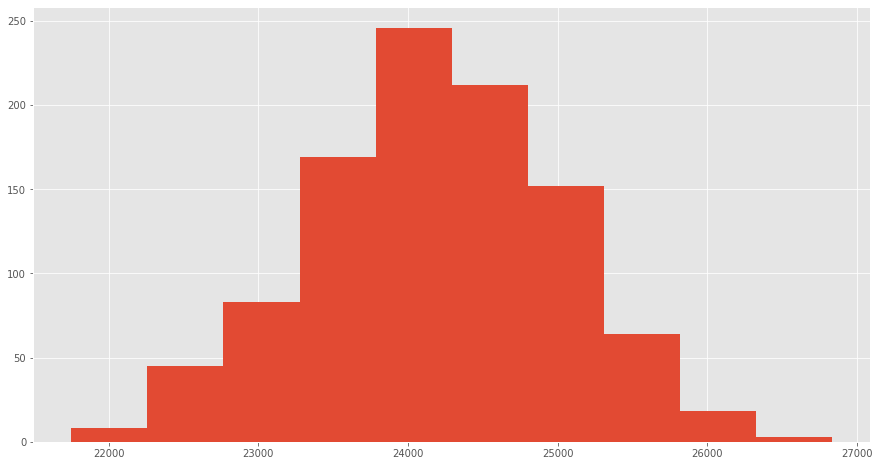

In [56]:
plt.hist(sat_att)

## Q5

If 4,500 DVDs are produced on Saturday for the concert later Saturday evening, what is the risk profile of profit (including all costs related to the DVD project)?  Produce a distribution of potential profits.

In [65]:
def profit_loss(n, p, n_dvd):
    n_buy = n*p
    if n_buy > n_dvd:
        n_buy = n_dvd
    revenue = 18 * n_buy
    cost = 11740 + 3000 + 1250 + 0.86 * n_buy + 1.02 * n_buy
    return revenue - cost

In [71]:
p_l = []
for i in sat_att:
    n = i 
    p = 0.1892
    n_dvd = 4500
    p_l.append(profit_loss(n, p, n_dvd))

(array([  2.,   4.,   8.,  16.,  23.,  32.,  28.,  52.,  61., 774.]),
 array([50344.649524 , 50965.1845716, 51585.7196192, 52206.2546668,
        52826.7897144, 53447.324762 , 54067.8598096, 54688.3948572,
        55308.9299048, 55929.4649524, 56550.       ]),
 <a list of 10 Patch objects>)

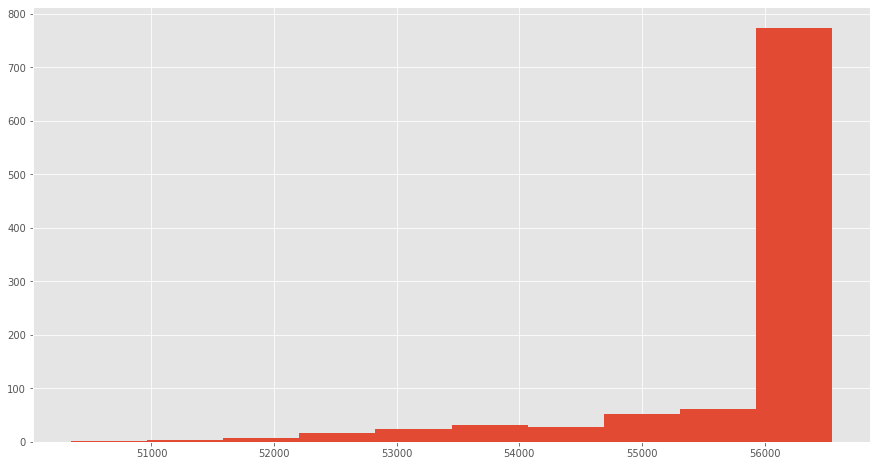

In [73]:
plt.hist(p_l)

**Q6**

Please make a recommendation for how many DVDs to order from the production company.  Please provide a risk profile (histogram) for the profit that will result.

In [80]:
def profit_loss(n, p):
    n_buy = n*p
    revenue = 18 * n_buy
    if n <= 5300:
        cost = 11740 + 3000 + 1250 + 0.86 * n_buy + 1.02 * n_buy
    else:
        cost = 11740 + 3000 + 1250 + 0.86 * n_buy + .2 * (n_buy - 5300) + 1.02 * n_buy
    return revenue - cost, n_buy

In [87]:
p_l = []
n_dvd = []
for i in sat_att:
    n = i 
    p = 0.1892
    p_l.append(profit_loss(n, p)[0])
    n_dvd.append(profit_loss(n, p)[1])

4442.433028 4574.4776


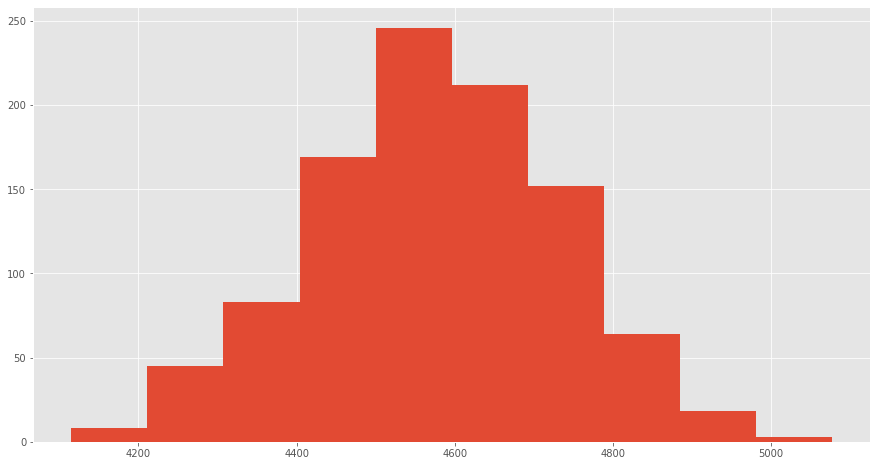

In [97]:
plt.hist(n_dvd)
print(st.mode(n_dvd), st.median(n_dvd))

(array([  8.,  45.,  83., 169., 246., 212., 152.,  64.,  18.,   3.]),
 array([50581.638984  , 52113.37593818, 53645.11289235, 55176.84984653,
        56708.5868007 , 58240.32375488, 59772.06070906, 61303.79766323,
        62835.53461741, 64367.27157158, 65899.00852576]),
 <a list of 10 Patch objects>)

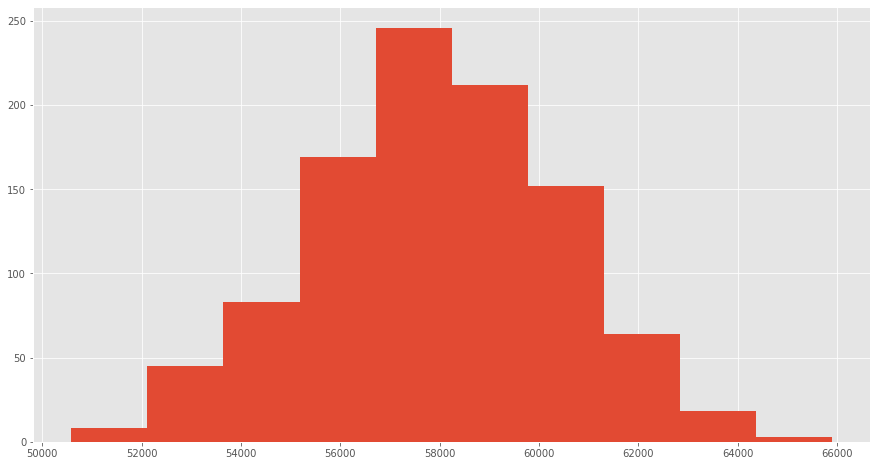

In [90]:
plt.hist(p_l)

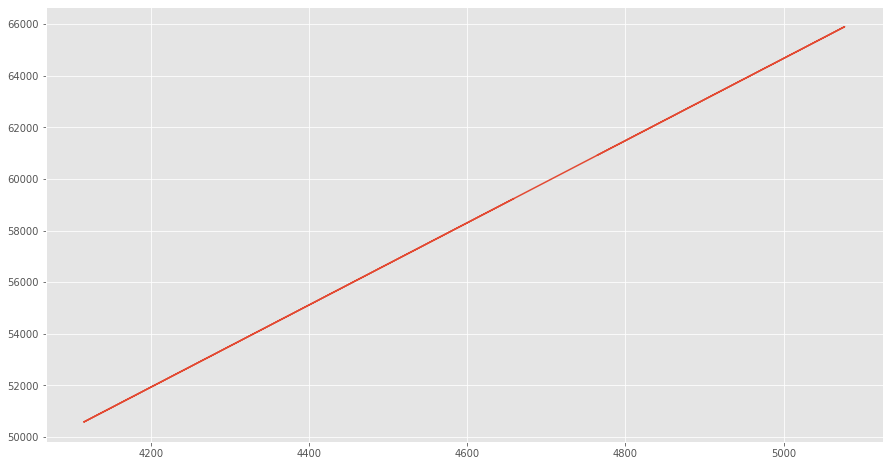

In [94]:
plt.plot(n_dvd, p_l)

I would suggest to order 4600 DVDs. Profit would increase with more DVD sold. DVD sold would be based on the Staurday attendance. The median of number of attendance willing to puchase DVDs is close to 4600. 4600 is smaller than 5300, so no additional cost for excess DVDs. I think this number is a safe guess to provide higher probability of positive profit.

**Q7**

In what ways can Carla Monte add value and reduce risk in the DVD project?  Use insights you can glean both from your model and creative managerial thinking to produce ideas.  Provide a rough rank order of the potential gains these ideas may provide.

To reduce risk, Carla could try to inrease the attendance on Friday, since the attendance on Friday is positively correlated with Satursay attendance. <br>
Also, Carla can increase the price of DVD. However, this increase of profit is not guranteed since the demand would also decrease. <br>


In [98]:
def profit_loss(n, p):
    n_buy = n*p
    revenue = 20 * n_buy
    if n <= 5300:
        cost = 11740 + 3000 + 1250 + 0.86 * n_buy + 1.02 * n_buy
    else:
        cost = 11740 + 3000 + 1250 + 0.86 * n_buy + .2 * (n_buy - 5300) + 1.02 * n_buy
    return revenue - cost, n_buy

In [99]:
p_l = []
n_dvd = []
for i in sat_att:
    n = i 
    p = 0.1892
    p_l.append(profit_loss(n, p)[0])
    n_dvd.append(profit_loss(n, p)[1])

(array([  8.,  45.,  83., 169., 246., 212., 152.,  64.,  18.,   3.]),
 array([58811.744384  , 60535.91060378, 62260.07682355, 63984.24304333,
        65708.4092631 , 67432.57548288, 69156.74170266, 70880.90792243,
        72605.07414221, 74329.24036198, 76053.40658176]),
 <a list of 10 Patch objects>)

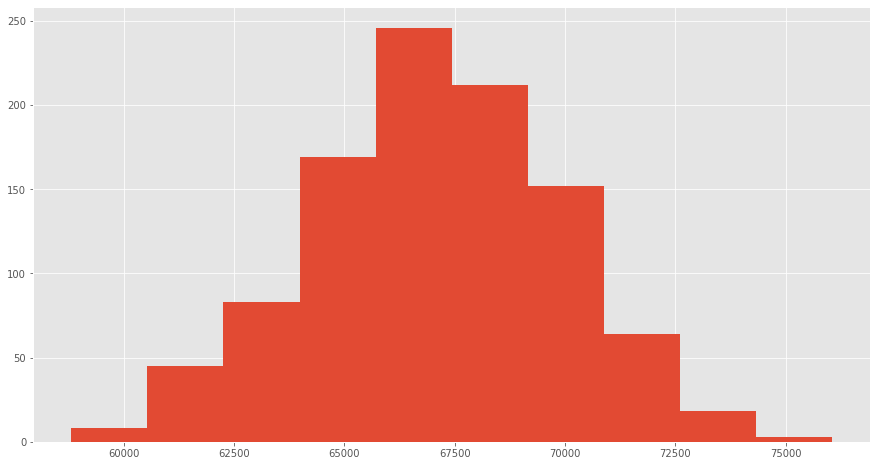

In [100]:
plt.hist(p_l)

In [ ]:
    # Statsmodels                                          
    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
    # Note the difference in argument order
    model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
mod = smf.ols(formula = 'Saturday_Attendance ~ Friday_Attendance + Saturday_Rain', data = E3)
res = mod.fit()
res.summary()